# **Custom object training with YOLOv3 and Darknet**

The phrase "You Only Look Once" is referred to as YOLO. 
This method detects and recognizes various objects in images (in real-time). 
YOLO performs object detection as a regression problem and outputs the class probabilities of the detected photos.


Convolutional neural networks (CNN) are used by the YOLO method to recognize items instantly. 
As the name implies, the algorithm only needs one forward propagation through a neural network to detect objects.


As a result, a single algorithm run is used to do prediction throughout the entire image. 
Simultaneously, several class probabilities and bounding boxes are predicted using CNN.


There are numerous variations of the YOLO algorithm. One of them is 
**YOLOv3**.


# **Step 1**
## Enabling and testing the GPU

The notebook's GPUs must first be enabled:

- Select Notebook Settings under Edit.
- choose GPU using the Hardware Accelerator drop-down

Next, we'll check if Tensorflow can connect to the GPU: By executing the following code, you may quickly determine whether the GPU is enabled.

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Thu Apr  6 18:21:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Step 2**
Mounting the Drive to store and load files.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Let's make the required files and directories for training with custom objects.


1. **YOLOV3_Custom/images**
2. **YOLOV3_Custom/custom.names** 
3. **YOLOV3_Custom/train.txt**
4. **YOLOV3_Custom/test.txt**
5. **YOLOV3_Custom/backup**
6. **YOLOV3_Custom/detector.data**
7. **YOLOV3_Custom/cfg**

**Changing directory to drive Directory**

In [ ]:
# changing directory to the google drive
import os
drive_path = os.path.join(os.getcwd(), "gdrive/MyDrive")
%cd {drive_path}

/content/gdrive/MyDrive


# **Step 3**
Creating Home directory to store all the files

In [ ]:
HOME = os.path.join(drive_path, "YOLOV3_Custom")
HOME

'/content/gdrive/MyDrive/YOLOV3_Custom'

In [ ]:
os.mkdir(f"{HOME}")

**Assigning path of the home directory to `HOME` for easy file handling**


In [ ]:
%cd {HOME}

/content/gdrive/MyDrive/YOLOV3_Custom


# **Step 4**
## *Creating Image Directory*
We will train our model to recognise pistols in this project, thus we must gather the images and its annotaions and save them in the ***YOLOV3_Custom/images*** directory.

## Unzip Files
* Your Google Drive file location that you wish to unzip is the path in the cell below.


In our case images and text files should be saved in **YOLOV3_Custom/images** directory. For e.g. **image1.jpg** should have a text file **image1.txt**.

In [ ]:
%cd {HOME}
!unzip "zip/images.zip"

# **Step 5**
## *Creating Custom.names file*
Labels of our objects should be saved in **YOLOV3_Custom/custom.names** file, each line in the file corresponds to an object. In our case since we have only one object class, the file should contain the following.


**custom.names**
```
Pistol
```




# **Step 6**
## *Creating Train and Test files*
The annotated photos can then be randomly split into train and test sets in a **80:20** ratio.

**YOLOV3_Custom/train.txt** The location of the train dataset should be listed in each file row.

**YOLOV3_Custom/test.txt** The location of the test dataset should be listed in each file row.



```
images/armas (1000).jpg
images/armas (1001).jpg
images/armas (1002).jpg
images/armas (1003).jpg
images/armas (1004).jpg
images/armas (1005).jpg
images/armas (1006).jpg
images/armas (1007).jpg

```



# **Step 7**
## *Creating Backup directory*
Creating backup directory for storing weights of the trained model.

# **Step 8**
## *Creating YOLO data file*
Make a file called "detector.data" in the "YOLOV3_Custom" directory that contains details about the train and test data sets.



```
classes=1
train=/train.txt
valid=/test.txt
names=/custom.names
backup=/backup
```



# **Step 9**
## *Cloning Directory to use Darknet*
Darknet, an open source neural network framework, will be used to train the detector. Download and create a dark network

In [ ]:
%cd {HOME}
!git clone https://github.com/AlexeyAB/darknet

/content/gdrive/MyDrive/YOLOV3_Custom
Cloning into 'darknet'...
remote: Enumerating objects: 15514, done.
remote: Total 15514 (delta 0), reused 0 (delta 0), pack-reused 15514
Receiving objects: 100% (15514/15514), 14.18 MiB | 13.43 MiB/s, done.
Resolving deltas: 100% (10412/10412), done.
Updating files: 100% (2058/2058), done.


In [ ]:
# Change current working directory to Darknet
%cd darknet

/content/gdrive/MyDrive/YOLOV3_Custom/darknet


### Change makefile to have GPU and OPENCV enabled, and other parameters for faster computation.

In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile 
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

### Model Compilation

In [ ]:
# compiling the model
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (i

# **Step 10**
## *Making changes in the yolo Configuration file*
We can choose the YOLOv3 configuration file based on the performance that is necessary. **Yolov3.cfg** will be used in this example. The file from **darknet/cfg/yolov3.cfg** can be copied to **YOLOV3_Custom/cfg/yolov3-custom.cfg**.

_

The neural network weights are iteratively adjusted as the images are trained. We may use large training sets, making it resource-intensive to update the weights for the full training set in a single cycle. The **batch** parameter is specified to utilise a small set of images to iteratively update the weights. It is initially set at 64.

_

The parameter **max batches** determines the maximum number of iterations for which our network should be trained. You can calculate its value with the formula **max_batches = classes*2000**, i.e. **2000** for a single class, and modify the line steps to **80%** and **90%** of max batches, which is **1600,1800**. 

when the model reaches to **2000 epochs** during training for 1 class, it will stop the training, because we defined that in our max_batches parameter, if you want to train your model beyound from that, increase the value of max_batches, and also increase its steps, like when you change the value to **max batches=6000**, modify the line steps to **80%** and **90%** of max batches, i.e. steps=4800,5400.  

--

The **classes** and **filters** parameters of the [yolo] and [convolutional] layers immediately preceding the [yolo] layers must be updated.


Since there is just one class in this project (Pistol), we will update the class parameter in the [yolo] layers to **1** at lines **610, 696, and 783**.

The **filters** parameter will also need to be updated based on the classes count: **filters=(classes + 5) * 3**. We should set **filters=18** for a single class at **line numbers: 603, 689, 776**.

YOLOV3_Custom/cfg/yolov3-custom.cfg contains all configuration changes.

# **Step 11**
## *Downloading Pre-trained weights*
To train our object detector, we can use the pre-trained weights that have already been trained on a large data sets. The pre-trained weights are available [here](https://pjreddie.com/media/files/darknet53.conv.74), and they can be downloaded to the root directory.

In [ ]:
%cd {HOME}
%cd pt-weights

# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

/content/gdrive/MyDrive/YOLOV3_Custom
/content/gdrive/MyDrive/YOLOV3_Custom/pt-weights
--2023-04-06 18:26:11--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.2’

darknet53.conv.74.2 100%[===================>] 154.96M  43.3MB/s    in 3.8s    

2023-04-06 18:26:15 (40.9 MB/s) - ‘darknet53.conv.74.2’ saved [162482580/162482580]



In [ ]:
# changing current drive to the darknet
%cd {HOME}/darknet

/content/gdrive/MyDrive/YOLOV3_Custom/darknet


# **Step 12**
## *Training the model*
As soon as we have all the necessary files and annotated photographs, we can begin our training.
Up till the loss reaches a predefined level, we can keep training. Weights for the custom detector are initially saved once every 100 iterations until 1,000 iterations, after which they are saved once every 10,000 iterations by default.

We can do detection using the generated weights after the training is finished.

In [ ]:
!./darknet detector train {HOME}/detector.data {HOME}/cfg/yolov3-custom.cfg {HOME}/pt-weights/darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 3053, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.292431), count: 1, class_loss = 96.565948, iou_loss = 3.761452, total_loss = 100.327400 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 339.406158, iou_loss = 0.000000, total_loss = 339.406158 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 1051.927368, iou_loss = 0.000000, total_loss = 1051.927368 
 total_bbox = 3054, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 96.804604, iou_loss = 0.000000, total_loss = 96.804604 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.296036), count: 2, class_loss = 339.963837, iou_loss = 8.946594, total_loss = 348

## *Continue training from where you left*
Continue training from where you left off, your Model training can be stopped due to multiple reasons, like the notebook time out, notebook craches, due to network issues,  and many more,  so you can start your training from where you left off, by passing the previous trained weights.

In [ ]:
!./darknet detector train {HOME}/detector.data {HOME}/cfg/yolov3-custom.cfg {HOME}/backup/yolov3-custom_4000.weights -dont_show

 CUDA-version: 11020 (11020), cuDNN: 8.1.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
yolov3-custom
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 

# **Step 13**
## *Calculating Mean average precision of Specific Weights*
As we have trained our weights up to 2000 epochs, we will calculate the mean average precision of our trained weights.

In [ ]:
!./darknet detector map {HOME}/detector.data {HOME}/cfg/yolov3-custom.cfg {HOME}/backup/yolov3-custom_4000.weights -dont_show

 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.59

# **Step 14** 
## *Test your custom Object Detector*

**Make changes to your custom config file**
*   change line batch to batch=1
*   change line subdivisions to subdivisions=1

You can do it either manually or by simply running the code below

In [ ]:
#set your custom cfg to test mode 
%cd {HOME}/cfg
!sed -i 's/batch=64/batch=1/' yolov3-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-custom.cfg

/content/gdrive/MyDrive/YOLOV3_Custom/cfg


## *Run detector on an image*

In [ ]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [ ]:
%cd {HOME}/darknet
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)
!./darknet detector test {HOME}/detector.data {HOME}/cfg/yolov3-custom.cfg {HOME}/backup/yolov3-custom_2000.weights {HOME}/pistol_Image.jpg -thresh 0.3

/content/gdrive/MyDrive/YOLOV3_Custom/darknet
 CUDA-version: 11080 (12000), cuDNN: 8.7.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/

/content/gdrive/MyDrive/YOLOV3_Custom/darknet


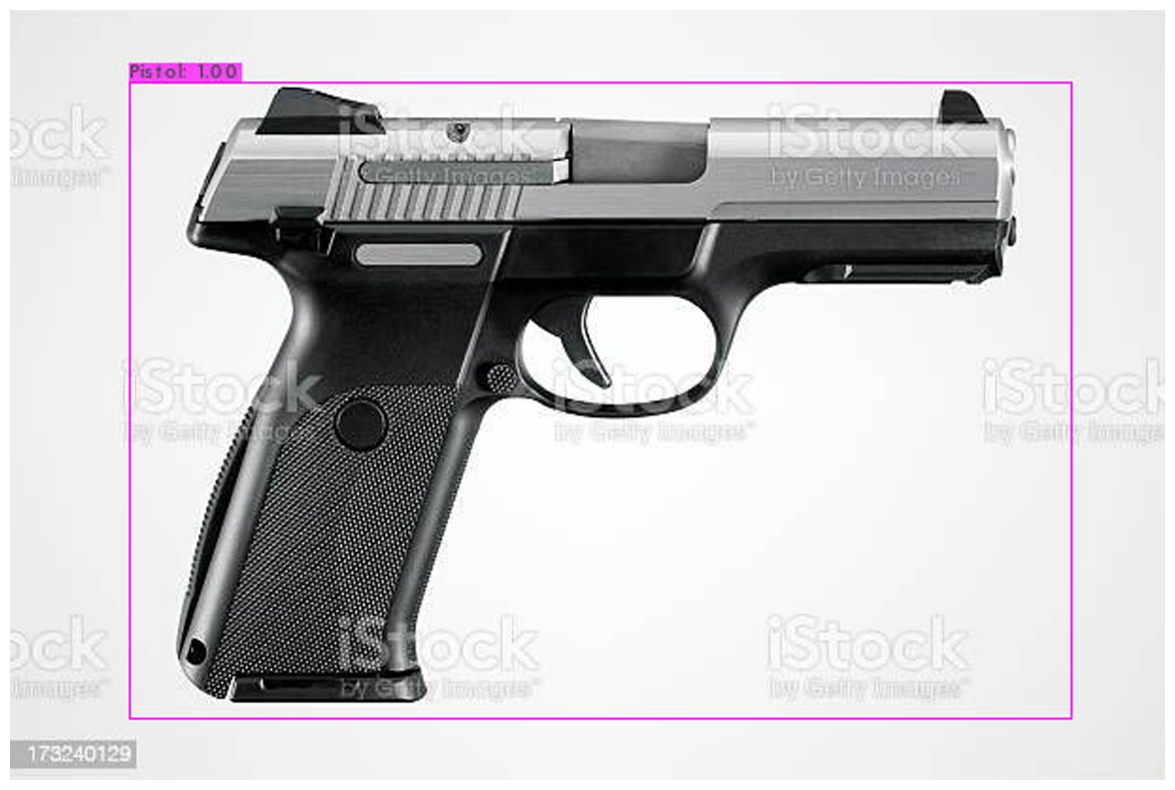

In [ ]:
%cd {HOME}/darknet
imShow('predictions.jpg')